In [1]:
!pip install transformers torch pandas scikit-learn

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:

df = pd.read_json('/content/drive/MyDrive/megavul_simple.json')

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 353873 entries, 0 to 353872
Data columns (total 19 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   cve_id                  353873 non-null  object 
 1   cwe_ids                 353873 non-null  object 
 2   cvss_vector             353778 non-null  object 
 3   cvss_is_v3              353778 non-null  float64
 4   repo_name               353873 non-null  object 
 5   commit_msg              353873 non-null  object 
 6   commit_hash             353873 non-null  object 
 7   git_url                 353873 non-null  object 
 8   file_path               353873 non-null  object 
 9   func_name               353873 non-null  object 
 10  func_before             17975 non-null   object 
 11  abstract_func_before    17975 non-null   object 
 12  func_graph_path_before  15664 non-null   object 
 13  func                    353873 non-null  object 
 14  abstract_func       

In [5]:

df.head()

,cve_id,cwe_ids,cvss_vector,cvss_is_v3,repo_name,commit_msg,commit_hash,git_url,file_path,func_name,func_before,abstract_func_before,func_graph_path_before,func,abstract_func,func_graph_path,diff_func,diff_line_info,is_vul
0,CVE-2016-2538,[CWE-189],AV:L/AC:L/Au:N/C:P/I:N/A:P,0.0,qemu,usb: check RNDIS buffer offsets & length\n\nWh...,fe3c546c5ff2a6210f9a4d8561cc64051ca8603e,https://github.com/qemu/qemu/commit/fe3c546c5f...,hw/usb/dev-network.c,rndis_query_response,static int rndis_query_response(USBNetState *s...,static int rndis_query_response(USBNetState *V...,qemu/fe3c546c5ff2a6210f9a4d8561cc64051ca8603e/...,static int rndis_query_response(USBNetState *s...,static int rndis_query_response(USBNetState *V...,qemu/fe3c546c5ff2a6210f9a4d8561cc64051ca8603e/...,"--- func_before\n+++ func_after\n@@ -10,8 +10,...",{'deleted_lines': [' if (bufoffs + buflen >...,True
1,CVE-2016-2538,[CWE-189],AV:L/AC:L/Au:N/C:P/I:N/A:P,0.0,qemu,usb: check RNDIS buffer offsets & length\n\nWh...,fe3c546c5ff2a6210f9a4d8561cc64051ca8603e,https://github.com/qemu/qemu/commit/fe3c546c5f...,hw/usb/dev-network.c,rndis_set_response,"static int rndis_set_response(USBNetState *s,\...",static int rndis_set_response(USBNetState *VAR...,qemu/fe3c546c5ff2a6210f9a4d8561cc64051ca8603e/...,"static int rndis_set_response(USBNetState *s,\...",static int rndis_set_response(USBNetState *VAR...,qemu/fe3c546c5ff2a6210f9a4d8561cc64051ca8603e/...,"--- func_before\n+++ func_after\n@@ -11,8 +11,...",{'deleted_lines': [' if (bufoffs + buflen >...,True
2,CVE-2016-2538,[CWE-189],AV:L/AC:L/Au:N/C:P/I:N/A:P,0.0,qemu,usb: check RNDIS buffer offsets & length\n\nWh...,fe3c546c5ff2a6210f9a4d8561cc64051ca8603e,https://github.com/qemu/qemu/commit/fe3c546c5f...,hw/usb/dev-network.c,usb_net_handle_dataout,static void usb_net_handle_dataout(USBNetState...,static void usb_net_handle_dataout(USBNetState...,qemu/fe3c546c5ff2a6210f9a4d8561cc64051ca8603e/...,static void usb_net_handle_dataout(USBNetState...,static void usb_net_handle_dataout(USBNetState...,qemu/fe3c546c5ff2a6210f9a4d8561cc64051ca8603e/...,"--- func_before\n+++ func_after\n@@ -30,8 +30,...",{'deleted_lines': [' if (offs + size <=...,True
3,CVE-2016-2841,[CWE-20],AV:L/AC:L/Au:N/C:N/I:N/A:P,0.0,qemu,net: ne2000: check ring buffer control registe...,415ab35a441eca767d033a2702223e785b9d5190,https://github.com/qemu/qemu/commit/415ab35a44...,hw/net/ne2000.c,ne2000_buffer_full,static int ne2000_buffer_full(NE2000State *s)\...,static int ne2000_buffer_full(NE2000State *VAR...,qemu/415ab35a441eca767d033a2702223e785b9d5190/...,static int ne2000_buffer_full(NE2000State *s)\...,static int ne2000_buffer_full(NE2000State *VAR...,qemu/415ab35a441eca767d033a2702223e785b9d5190/...,"--- func_before\n+++ func_after\n@@ -1,6 +1,10...","{'deleted_lines': [], 'added_lines': ['', ' ...",True
4,CVE-2016-2841,[CWE-20],AV:L/AC:L/Au:N/C:N/I:N/A:P,0.0,qemu,net: ne2000: check ring buffer control registe...,415ab35a441eca767d033a2702223e785b9d5190,https://github.com/qemu/qemu/commit/415ab35a44...,hw/net/ne2000.c,ne2000_mem_readl,None,None,None,static inline uint32_t ne2000_mem_readl(NE2000...,static inline uint32_t ne2000_mem_readl(NE2000...,qemu/415ab35a441eca767d033a2702223e785b9d5190/...,None,None,False


In [9]:
df.isnull().sum()

,0
cve_id,0
cwe_ids,0
cvss_vector,95
cvss_is_v3,95
repo_name,0
commit_msg,0
commit_hash,0
git_url,0
file_path,0
func_name,0


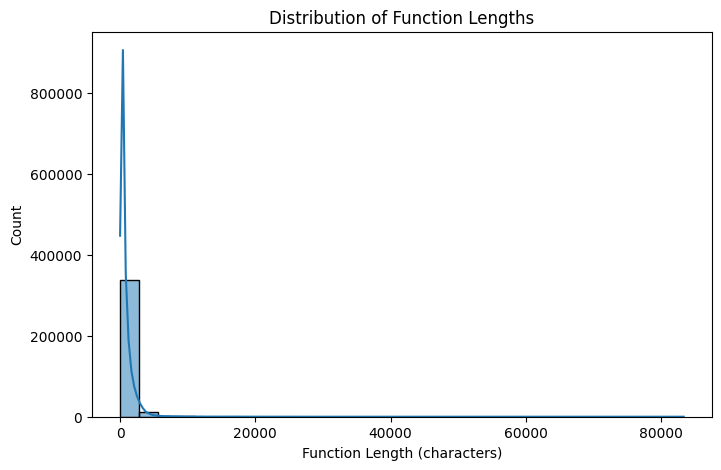

In [15]:
df["function_length"] = df["func"].apply(lambda x: len(str(x)))

plt.figure(figsize=(8, 5))
sns.histplot(df["function_length"], bins=30, kde=True)
plt.xlabel("Function Length (characters)")
plt.ylabel("Count")
plt.title("Distribution of Function Lengths")
plt.show()

In [17]:
for col in df.columns[:-1]:  # Excluding the last column
    print(f"{col}: {df[col].apply(type).value_counts()}")


cve_id: cve_id
<class 'str'>    353873
Name: count, dtype: int64
cwe_ids: cwe_ids
<class 'list'>    353873
Name: count, dtype: int64
cvss_vector: cvss_vector
<class 'str'>         353778
<class 'NoneType'>        95
Name: count, dtype: int64
cvss_is_v3: cvss_is_v3
<class 'float'>    353873
Name: count, dtype: int64
repo_name: repo_name
<class 'str'>    353873
Name: count, dtype: int64
commit_msg: commit_msg
<class 'str'>    353873
Name: count, dtype: int64
commit_hash: commit_hash
<class 'str'>    353873
Name: count, dtype: int64
git_url: git_url
<class 'str'>    353873
Name: count, dtype: int64
file_path: file_path
<class 'str'>    353873
Name: count, dtype: int64
func_name: func_name
<class 'str'>    353873
Name: count, dtype: int64
func_before: func_before
<class 'NoneType'>    335898
<class 'str'>          17975
Name: count, dtype: int64
abstract_func_before: abstract_func_before
<class 'NoneType'>    335898
<class 'str'>          17975
Name: count, dtype: int64
func_graph_path_bef

In [20]:
df.shape

(353873, 20)

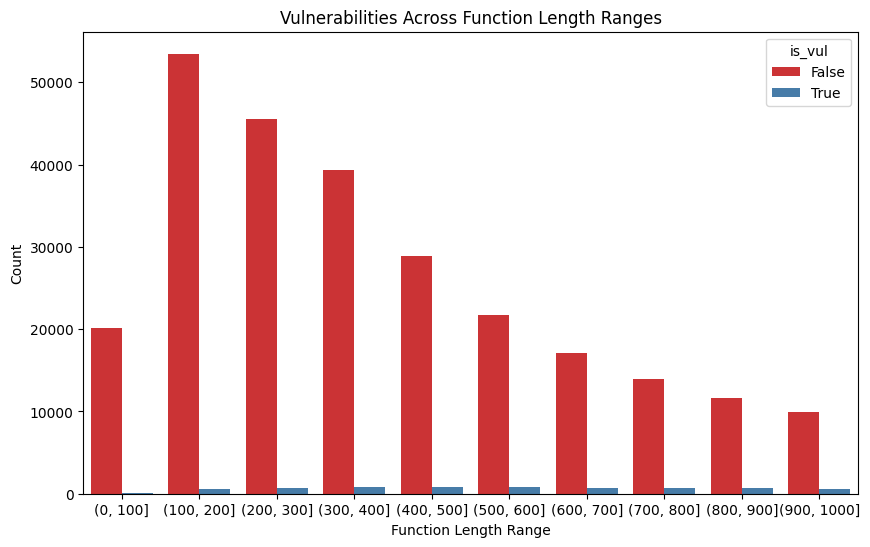

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'length_range' is already computed and added to df
plt.figure(figsize=(10, 6))
sns.countplot(x='length_range', hue='is_vul', data=df, palette='Set1')
plt.title('Vulnerabilities Across Function Length Ranges')
plt.xlabel('Function Length Range')
plt.ylabel('Count')
plt.show()